<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - 3rd Phase
<br />
Image Denoising using Autoencoder and PCA
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 99105901
            <br />
            Name = Amirhossein
            <br />
            Last_Name = Akbari
        </div>
        <div class="column">
        <br />
            student_number = 99106255
            <br />
            Name = Alireza  
            <br />
            Last_Name = Shokrani
        </div>
    </font>
    </div>


1. Download the MNIST dataset and create a dataloader that adds gaussian noise to the input images.
2. Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.
3. Visualize original images, their corresponding noisy images and their reconstructed versions side by side.
4. Repeat the previous steps using PCA algorithm.

# Import Necessary Libraries

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Load Dataset and Prepare It

In [12]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)


batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

std_dev = 0.2


# Define Your Model
torch neural network model

In [13]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        decoded = decoded.view(decoded.size(0), 1, 28, 28)
        return encoded, decoded

autoencoder = Autoencoder()


# Fit The Model
Also Define optimizer, Criterion and other parameters 

In [14]:
lr = 0.001
num_epochs = 10
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=lr)

for epoch in range(num_epochs):
    for batch_idx, (data, _) in enumerate(train_loader):
        noisy_data = data + torch.randn(data.size()) * std_dev
        optimizer.zero_grad()
        _, output = autoencoder(noisy_data)
        loss = criterion(output, data)
        loss.backward()
        optimizer.step()

        if (batch_idx + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch + 1, num_epochs, batch_idx + 1, len(train_loader), loss.item()))


Epoch [1/10], Step [100/938], Loss: 0.0640
Epoch [1/10], Step [200/938], Loss: 0.0461
Epoch [1/10], Step [300/938], Loss: 0.0380
Epoch [1/10], Step [400/938], Loss: 0.0339
Epoch [1/10], Step [500/938], Loss: 0.0283
Epoch [1/10], Step [600/938], Loss: 0.0261
Epoch [1/10], Step [700/938], Loss: 0.0235
Epoch [1/10], Step [800/938], Loss: 0.0240
Epoch [1/10], Step [900/938], Loss: 0.0219
Epoch [2/10], Step [100/938], Loss: 0.0209
Epoch [2/10], Step [200/938], Loss: 0.0185
Epoch [2/10], Step [300/938], Loss: 0.0203
Epoch [2/10], Step [400/938], Loss: 0.0182
Epoch [2/10], Step [500/938], Loss: 0.0164
Epoch [2/10], Step [600/938], Loss: 0.0176
Epoch [2/10], Step [700/938], Loss: 0.0151
Epoch [2/10], Step [800/938], Loss: 0.0178
Epoch [2/10], Step [900/938], Loss: 0.0167
Epoch [3/10], Step [100/938], Loss: 0.0147
Epoch [3/10], Step [200/938], Loss: 0.0129
Epoch [3/10], Step [300/938], Loss: 0.0155
Epoch [3/10], Step [400/938], Loss: 0.0151
Epoch [3/10], Step [500/938], Loss: 0.0132
Epoch [3/10

# Plot The Results

torch.Size([64, 1, 28, 28])


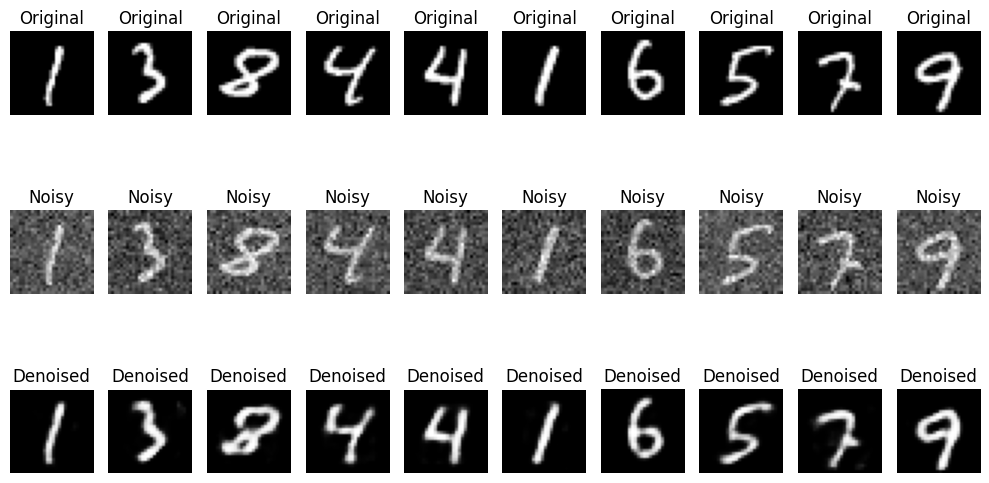

In [51]:

num_images = 10
images, _ = next(iter(test_loader))
print(images.shape)
noisy_images = images + torch.randn(images.size()) * std_dev
encoded_images, denoised_images = autoencoder(noisy_images)


images = images.numpy()
noisy_images = noisy_images.numpy()
denoised_images = denoised_images.detach().numpy()

fig, axes = plt.subplots(nrows=3, ncols=num_images, figsize=(10, 6))

idx = np.random.randint(0, len(images), num_images)
for i, id in enumerate(idx):
    axes[0, i].imshow(np.squeeze(images[id]), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    axes[1, i].imshow(np.squeeze(noisy_images[id]), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Noisy')

    axes[2, i].imshow(np.squeeze(denoised_images[id]), cmap='gray')
    axes[2, i].axis('off')
    axes[2, i].set_title('Denoised')

plt.tight_layout()
plt.show()


# PCA

In [74]:

from sklearn.preprocessing import MinMaxScaler

train_loader_pca = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size*100, shuffle=True)
set, _ = next(iter(train_loader_pca))
trainset = set.numpy().reshape(-1, 784)
trainset = MinMaxScaler().fit_transform(trainset)

rng = np.random.RandomState(0)
noise = rng.normal(scale=std_dev, size=trainset.shape)
trainset = trainset + noise


pca = PCA(n_components=64)

_ = pca.fit(trainset)


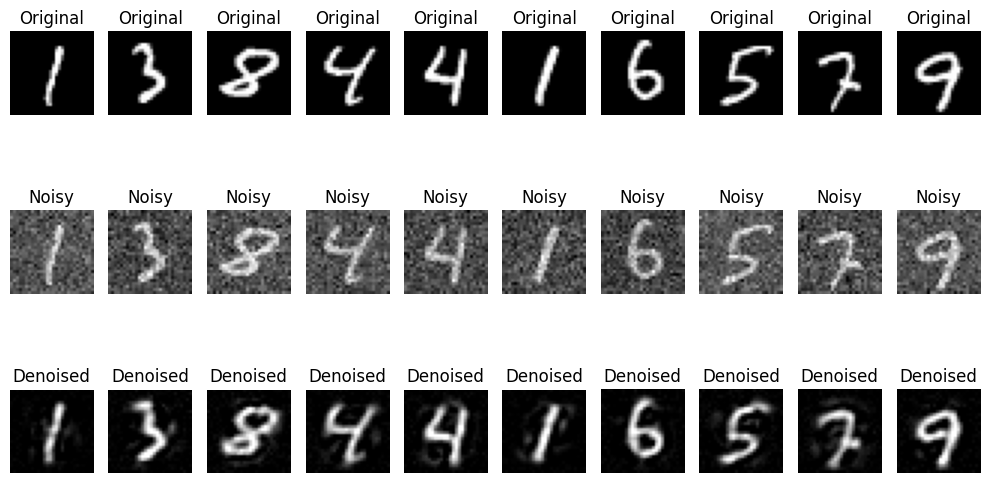

In [75]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(noisy_images.reshape(-1, 784)))
X_reconstructed_pca = X_reconstructed_pca.reshape(-1, 28, 28)
X_reconstructed_pca = X_reconstructed_pca * (X_reconstructed_pca > 0 * 1.0)
X_reconstructed_pca[X_reconstructed_pca > 1] = 1

fig, axes = plt.subplots(nrows=3, ncols=num_images, figsize=(10, 6))

for i, id in enumerate(idx):
    axes[0, i].imshow(np.squeeze(images[id]), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title('Original')

    axes[1, i].imshow(np.squeeze(noisy_images[id]), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title('Noisy')


    axes[2, i].imshow(X_reconstructed_pca[id], cmap='gray')

    axes[2, i].axis('off')
    axes[2, i].set_title('Denoised')

plt.tight_layout()
plt.show()